In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('voice.csv')

In [32]:
model_score = pd.DataFrame()

In [3]:
data['label']

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

### Decode Label to numeric for classificationt taks

In [4]:
encode = {'label':{'male':1,'female':0}} 

data.replace(encode, inplace=True)

In [5]:
data['label']

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

### Transfer data as numpy array

In [6]:
voice_data = np.array(data.loc[:, data.columns != 'label'])
labels = np.array(data.loc[:,'label'])

In [7]:
voice_data.shape

(3168, 20)

In [8]:
labels.shape

(3168,)

# First Classifier - SVM with K-fold cross validation

In [9]:
from sklearn.model_selection import KFold , RepeatedKFold
from  sklearn.svm  import  SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [10]:
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
scores = []
svr = SVC(kernel='rbf')
for train_index, test_index in kf.split(voice_data,labels):
    #print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = voice_data[train_index], voice_data[test_index] 
    y_train, y_test = labels[train_index], labels[test_index]
    svr.fit(X_train, y_train)
    scores.append(svr.score(X_test, y_test))

In [11]:
print(scores)

[0.6482649842271293, 0.6451104100946372, 0.692429022082019, 0.6808846761453397, 0.684044233807267, 0.6703470031545742, 0.6987381703470031, 0.6545741324921136, 0.6587677725118484, 0.6824644549763034, 0.6435331230283912, 0.6624605678233438, 0.6971608832807571, 0.6793048973143759, 0.6587677725118484, 0.6892744479495269, 0.6403785488958991, 0.6640378548895899, 0.684044233807267, 0.6729857819905213, 0.6593059936908517, 0.6624605678233438, 0.6987381703470031, 0.6793048973143759, 0.6856240126382307, 0.6876971608832808, 0.6451104100946372, 0.6356466876971609, 0.6793048973143759, 0.674565560821485, 0.6735015772870663, 0.6482649842271293, 0.6577287066246057, 0.6966824644549763, 0.69826224328594, 0.6766561514195584, 0.694006309148265, 0.6798107255520505, 0.6461295418641391, 0.6445497630331753, 0.6435331230283912, 0.6813880126182965, 0.6656151419558359, 0.669826224328594, 0.7045813586097947, 0.667192429022082, 0.6482649842271293, 0.6798107255520505, 0.6666666666666666, 0.6824644549763034]


In [12]:
x_train,x_test,y_train,y_test = train_test_split(voice_data,labels,test_size = 0.2)

In [13]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [14]:
svc_model.score(x_test,y_test)

0.6766561514195584

In [15]:
y_pred = svc_model.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.55      0.63       312
           1       0.65      0.80      0.71       322

    accuracy                           0.68       634
   macro avg       0.69      0.67      0.67       634
weighted avg       0.69      0.68      0.67       634



### Scale Features

In [17]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [18]:
svc_model.fit(x_train,y_train)

SVC()

In [33]:
svc_score = svc_model.score(x_test,y_test)

print(svc_score)

0.9858044164037855


In [34]:
model_score['svc_score'] = svc_score

### After Scaling features model accuracy improves significantly

In [20]:
y_pred = svc_model.predict(x_test)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       312
           1       0.99      0.98      0.99       322

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [22]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[308,   4],
       [  5, 317]])

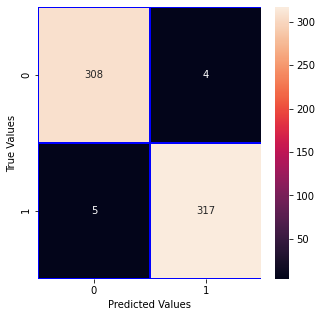

In [23]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="blue",fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# Second Classifier : Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
lr_score = lr.score(x_test,y_test)
print(lr_score)

0.9779179810725552


In [36]:
model_score['lr_score'] = lr_score

In [37]:
lr_pred = lr.predict(x_test)

In [38]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       312
           1       0.98      0.98      0.98       322

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [39]:
lr_conf_mat = confusion_matrix(y_test,lr_pred)
lr_conf_mat

array([[304,   8],
       [  6, 316]])

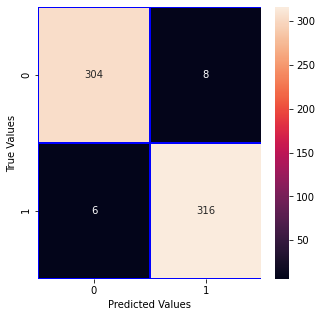

In [40]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_conf_mat,annot=True,linewidths=0.5,linecolor="blue",fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

# Third Classifier : Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier(n_estimators = 200,random_state = 42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [48]:
rf_score = rf_model.score(x_test,y_test)
model_score['rf_score'] = rf_score
print(rf_score)

0.9889589905362776


In [49]:
rf_preds = rf_model.predict(x_test)

In [50]:
rf_conf_mat = confusion_matrix(y_test,rf_preds)
rf_conf_mat

array([[311,   1],
       [  6, 316]])

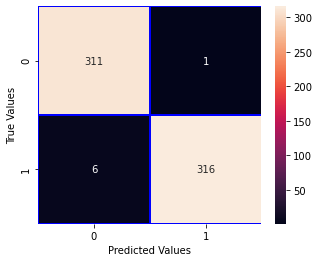

In [75]:
f, ax = plt.subplots(figsize=(5,4))
sns.heatmap(rf_conf_mat,annot=True,linewidths=0.5,linecolor="blue",fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [65]:
from sklearn.ensemble import ExtraTreesClassifier

In [66]:
ETC = ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [67]:
etc_score = ETC.score(x_test,y_test)
model_score['etc_score'] = etc_score
print(etc_score)

0.9936908517350158


In [68]:
etc_pred = ETC.predict(x_test)

In [69]:
etc_conf_mat = confusion_matrix(y_test,etc_pred)
etc_conf_mat

array([[311,   1],
       [  3, 319]])

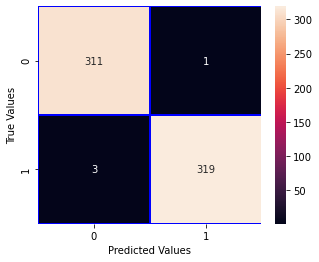

In [74]:
f, ax = plt.subplots(figsize=(5,4))
sns.heatmap(etc_conf_mat,annot=True,linewidths=0.8,linecolor="blue",fmt=".0f")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [71]:
model_score

,svc_score,lr_score,rf_score,etc_score
